Capstone 1 Data Story 
Data source :https://www.kaggle.com/wendykan/lending-club-loan-data
In this exploration of the lending club loan data we would try to answer two factors that would help the investors obtain comprehensible idea of investing at Lending club. We shall focus on the below major aspects 
    1.Risks in lending 
        To better analyze the above measures we need to have a clear understanding of the below questions 
        a)How does the interest rate affect the repayment?(Regression analysis)
        b)What are the states which have heavy defaults?
        c)Was there any partiular year that has a great downfall in repayment ?
       
   




In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('loan.csv',low_memory=False)

In [3]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#We are going to analyze how much does a lender makes a deal for investing so that it might help the upcoming lenders to invest

#Lets rename few columns for better analysis 

df = df.rename (
    columns={
        'loan_amnt':'loan_amount',
        'funded_amnt':'funded_amount',
        'funded_amnt_inv':'investor_fund',
        'int_rate':'interest_rate',
        'annual_inc':'annual_income',
        'loan_status':'loan_status_present'})


In [5]:
thresh = len(df) *.25
df.dropna(thresh=thresh,axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 54 columns):
id                            887379 non-null int64
member_id                     887379 non-null int64
loan_amount                   887379 non-null float64
funded_amount                 887379 non-null float64
investor_fund                 887379 non-null float64
term                          887379 non-null object
interest_rate                 887379 non-null float64
installment                   887379 non-null float64
grade                         887379 non-null object
sub_grade                     887379 non-null object
emp_title                     835917 non-null object
emp_length                    842554 non-null object
home_ownership                887379 non-null object
annual_income                 887375 non-null float64
verification_status           887379 non-null object
issue_d                       887379 non-null object
loan_status_present           887379 

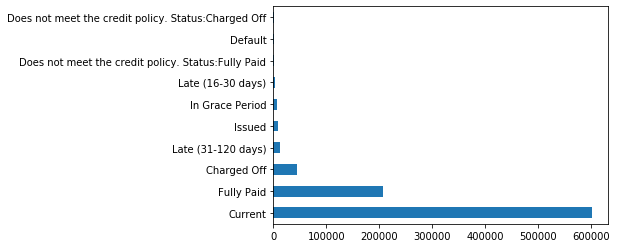

In [7]:
df['loan_status_present'].value_counts().plot.barh()
plt.show()

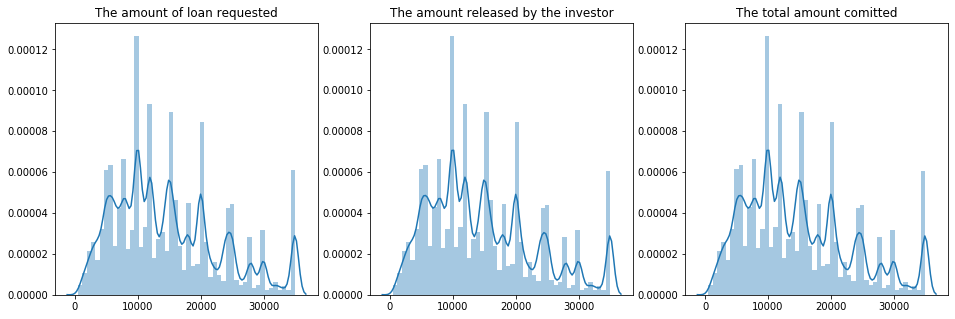

In [8]:
fig,ax = plt.subplots(1,3,figsize=(16,5))
loan_amount = df['loan_amount'].values
lending_amount =df['funded_amount'].values
amount_committed = df['investor_fund'].values

import seaborn as sns
sns.distplot(loan_amount,ax=ax[0])
ax[0].set_title('The amount of loan requested')
sns.distplot(lending_amount,ax=ax[1])
ax[1].set_title('The amount released by the investor')
sns.distplot(lending_amount,ax=ax[2])
ax[2].set_title('The total amount comitted')
plt.show()

In [9]:
#Lets try to have a look at the loan recived by state 
df['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME', 'ND'], dtype=object)

Counter({'south_east': 14, 'mid_west': 12, 'west': 11, 'north_east': 10, 'south_west': 4})


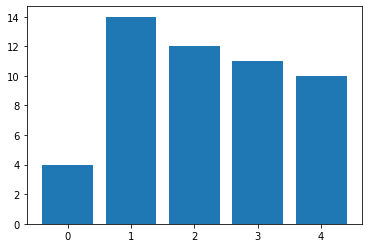

In [10]:
west =['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west =['AZ', 'TX', 'NM', 'OK']
south_east =['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN']
mid_west =['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east =['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']
states_total =[]

def checkstate(state):
    for i in state:
        if i in west:
            states_total.append('west')
        if i in south_west:
            states_total.append('south_west')
        if i in south_east:
            states_total.append('south_east')
        if i in mid_west:
            states_total.append('mid_west')
        if i in north_east:
            states_total.append('north_east')
import matplotlib.pyplot as plt
checkstate(df['addr_state'].unique())
from collections import Counter 
counter = Counter(states_total)
print(counter)
plt.bar(range(len(counter)), counter.values())
plt.show()

In [11]:
df['issue_d'].head()

0    Dec-2011
1    Dec-2011
2    Dec-2011
3    Dec-2011
4    Dec-2011
Name: issue_d, dtype: object

In [12]:
dt_issue_date  = pd.to_datetime(df["issue_d"])
print(type(dt_issue_date))

<class 'pandas.core.series.Series'>


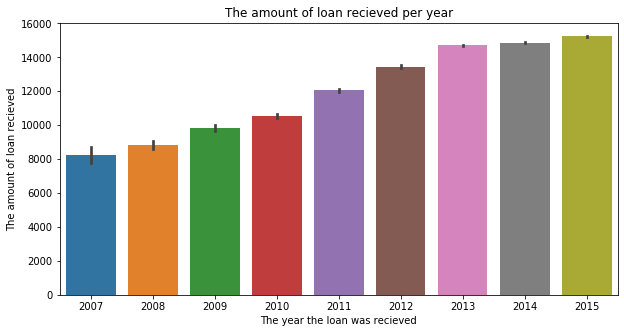

In [13]:
df['year'] = dt_issue_date.dt.year
plt.figure(figsize=(10,5))
sns.barplot('year','loan_amount',data=df)
plt.title('The amount of loan recieved per year')
plt.xlabel('The year the loan was recieved')
plt.ylabel('The amount of loan recieved')
plt.show()

We could see that the growth rate was dropping in the early years like 2007 ,2008 and gradually gained its growth rate around 2015.There is tremendous amount of loan amount recieved in 2007 from $8000 to $15000 in 2015.
        We could infer the following from the above graph 
        1)The highest amount of loan recieved was at 2015 and the year with the least amount was at 2007
        2)All the average loans that are recieved are around $10000 to $12000
        

Bad loan vs Good loan 


In [14]:
df['loan_status_present'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status_present, dtype: int64

In [15]:
bad_loans = ['Charged Off','Late (31-120 days)','In Grace Period','Late (16-30 days)','Default','Does not meet the credit policy. Status:Charged Off']

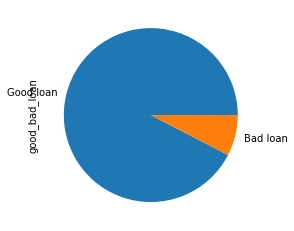

In [16]:
import numpy as np
df['good_bad_loan'] = np.nan

def good_vs_bad(status):
    if status in bad_loans:
        return 'Bad loan'
    else:
        return 'Good loan'
df['good_bad_loan']=df['loan_status_present'].apply(good_vs_bad)
df['good_bad_loan'].value_counts().plot.pie(subplots=True)
plt.show()

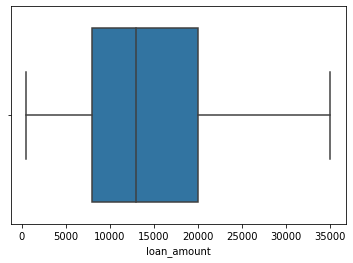

In [27]:
sns.boxplot(x=df['loan_amount'])
plt.show()

As we could see there are no outliers in the loan amount that is being issued and average amount of loan that could be issued ranges from $12000 to $14000

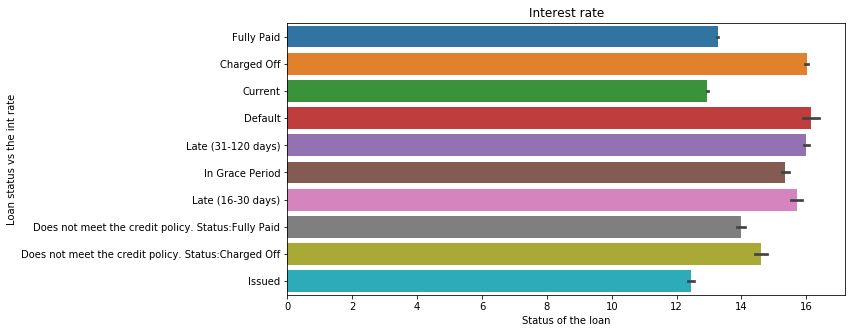

In [30]:
plt.figure(figsize=(10,5))
sns.barplot('interest_rate','loan_status_present',data=df)
plt.title('Interest rate')
plt.xlabel('Status of the loan')
plt.ylabel('Loan status vs the int rate')
plt.show()